In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from shapely.geometry import MultiPoint
import os
import matplotlib.pyplot as plt

In [109]:
path_to_test_csv_out = '/Users/danielfisher/Projects/kcl-globalgasflaring/data/processed/yearly/ats/2003'
df_files = os.listdir(path_to_test_csv_out)
df_list = [pd.read_csv(os.path.join(path_to_test_csv_out, f)) for f in df_files]

In [116]:
year_df = pd.concat(df_list, ignore_index=True)
year_df.shape

(819341, 4)

In [117]:
coords = year_df.as_matrix(columns=['lats', 'lons'])

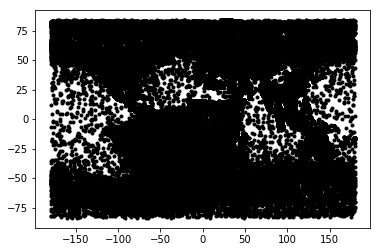

In [118]:
plt.plot(coords[:,1], coords[:,0], 'k.')
plt.show()

In [119]:
kms_per_radian = 6371.0088
epsilon = 1 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=4, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

In [120]:
cluster_labels = db.labels_
len(set(cluster_labels))

3226

In [122]:
year_df['clusters'] = cluster_labels

In [123]:
sub_df = new_df[new_df['clusters'] != -1]

In [124]:
grouped_df = sub_df.groupby('clusters').agg({'frp': np.mean, 'lats': np.mean, 'lons': np.mean})

In [125]:
grouped_df.head()

,lons,frp,lats
clusters,,,
0,-60.156987,1.689758,-33.368187
1,-69.941399,2.224130,8.907966
2,-66.401424,0.803525,9.679796
3,-66.320392,0.788363,9.872165
4,-70.231530,3.893164,11.623296


In [126]:
sub_coords = grouped_df.as_matrix(columns=['lats', 'lons'])

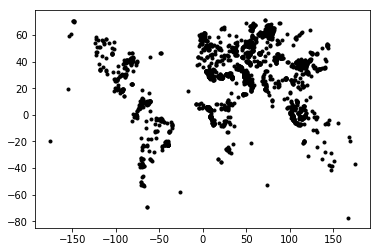

In [127]:
plt.plot(sub_coords[:,1], sub_coords[:,0], 'k.')
plt.show()